In [46]:
import pandas as pd

In [47]:
a=pd.read_csv('구면적.csv',header=2)

In [48]:
a.head()

,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계.1
0,서울시,소계,605.24,100.00,426,466,12859,96471
1,서울시,종로구,23.91,3.95,17,87,279,1475
2,서울시,중구,9.96,1.65,15,74,253,1580
3,서울시,용산구,21.87,3.61,16,36,356,2597
4,서울시,성동구,16.86,2.79,17,17,471,3645


In [49]:
a=a.drop(0)

In [50]:
a=a[['자치구별(2)','면적 (km²)','구성비 (%)']]

In [51]:
a.sort_values('면적 (km²)',ascending=False)

,자치구별(2),면적 (km²),구성비 (%)
22,서초구,46.98,7.76
16,강서구,41.45,6.85
23,강남구,39.50,6.53
11,노원구,35.44,5.86
24,송파구,33.88,5.60
12,은평구,29.71,4.91
21,관악구,29.57,4.89
25,강동구,24.59,4.06
8,성북구,24.58,4.06
19,영등포구,24.55,4.06


In [52]:
a.rename(columns={'자치구별(2)':'자치구'},inplace=True)

In [53]:
b=pd.read_csv('df_seoul_business.csv')

In [54]:
b.head()

,자치구,부동산 중개 및 대리업 사업체수,두발미용업 사업체수,남녀용 겉옷 및 셔츠 도매업 사업체수,기타주점업 사업체수,일반 교과 학원 사업체수,"택시,용달 운송업 사업체수","한식 음식점,커피 전문점 사업체수",등록업종총합
0,강남구,4674,2482,768,1426,2852,4482,9732,26416
1,강동구,2376,1800,118,1178,1240,9646,4150,20508
2,강북구,1178,1346,80,1160,440,5474,3370,13048
3,강서구,2622,2030,156,1588,1344,11068,5192,24000
4,관악구,2020,1790,62,1316,708,5730,4458,16084


In [55]:
c=pd.merge(a,b,how='inner',on='자치구')

In [56]:
d=pd.read_csv('df_seoul_bus_station.csv')

In [57]:
d=d[['자치구','정류장수','노선수']]

In [58]:
e=pd.merge(c,d,how='inner',on='자치구')

In [59]:
e.head().sort_values('면적 (km²)',ascending=False)

,자치구,면적 (km²),구성비 (%),부동산 중개 및 대리업 사업체수,두발미용업 사업체수,남녀용 겉옷 및 셔츠 도매업 사업체수,기타주점업 사업체수,일반 교과 학원 사업체수,"택시,용달 운송업 사업체수","한식 음식점,커피 전문점 사업체수",등록업종총합,정류장수,노선수
0,종로구,23.91,3.95,549,261,400,537,110,833,2933,5623,349,106
2,용산구,21.87,3.61,1582,732,108,974,208,1742,3582,8928,323,67
4,광진구,17.06,2.82,1742,1492,178,1266,826,4174,4040,13718,269,41
3,성동구,16.86,2.79,1602,978,298,570,516,4544,3806,12314,435,58
1,중구,9.96,1.65,1152,678,21620,762,114,1060,5800,31186,178,103


In [60]:
e=e[['자치구','면적 (km²)','등록업종총합','정류장수','노선수']]

In [61]:
f=e[['자치구','면적 (km²)','정류장수']]

In [62]:
f.head()

,자치구,면적 (km²),정류장수
0,종로구,23.91,349
1,중구,9.96,178
2,용산구,21.87,323
3,성동구,16.86,435
4,광진구,17.06,269


In [63]:
f=f.reset_index()

In [64]:
f.to_csv("area.csv", index = False)

In [65]:
f=f.set_index('자치구')

In [66]:
print(stats.pearsonr(f['정류장수'],f['면적 (km²)']))

(0.7017665603807792, 9.256651570672462e-05)


In [67]:
e=e.set_index('자치구')

In [68]:
e['면적대비등록업종']=e['등록업종총합']/e['면적 (km²)']

In [80]:
e=e.reset_index()

In [69]:
e.to_csv("area_business.csv", index = False)

In [70]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')       

In [71]:
print(stats.pearsonr(e['정류장수'],e['면적대비등록업종']))
print(stats.pearsonr(e['노선수'],e['면적대비등록업종']))

(-0.5738687987461559, 0.00270431052764977)
(0.08798386298569065, 0.6757937586086559)


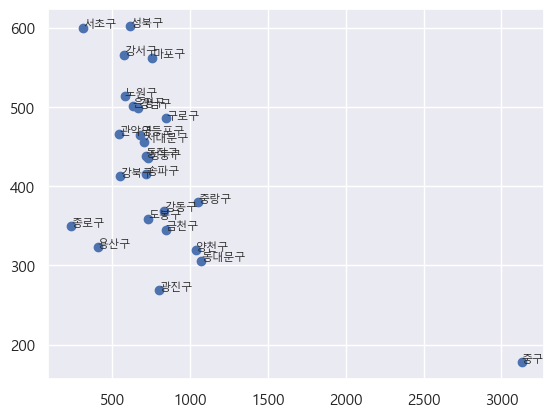

In [79]:
plt.scatter('면적대비등록업종','정류장수',data=e)
for name,x,y in zip(e.index,e['면적대비등록업종'],e['정류장수']): 
    plt.text(x, y, name,fontsize=8) 
plt.show()

In [73]:
(e['정류장수']/e['면적대비등록업종']).sort_values(ascending=True)

자치구
중구      0.056849
동대문구    0.285745
양천구     0.307894
광진구     0.334534
중랑구     0.361514
금천구     0.409247
강동구     0.442447
도봉구     0.489524
구로구     0.574115
송파구     0.576143
성동구     0.595590
동작구     0.612975
서대문구    0.644380
영등포구    0.682842
마포구     0.741601
강남구     0.746158
강북구     0.746996
용산구     0.791220
은평구     0.791403
관악구     0.856728
노원구     0.885225
성북구     0.975037
강서구     0.977529
종로구     1.484010
서초구     1.911829
dtype: float64

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [75]:
X=e.면적대비등록업종.values
Y=e.정류장수.values

X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

lr.fit(X, Y)

LinearRegression()

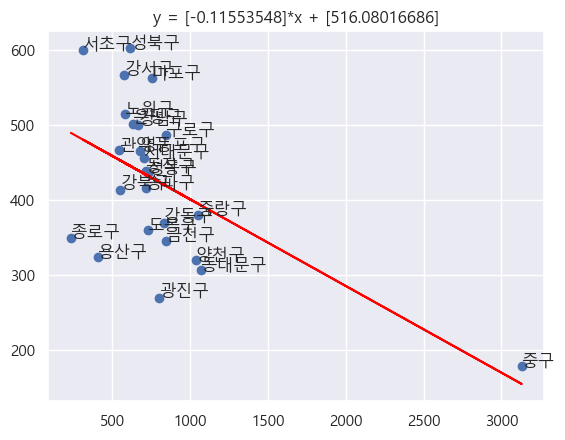

In [81]:
import matplotlib.pyplot as plt
y2 = lr.coef_[0]*X + lr.intercept_
plt.scatter(X, Y)
for i in range(len(e)): # 행 개수만큼 순회
     row = e.iloc[i] # 한 행씩 꺼내기
     name = row['자치구'] # 이름이 저장된 열
     x = row['면적대비등록업종'] # x좌표가 저장된 열
     y = row['정류장수'] # y좌표가 저장된 열

     plt.text(x, y, name)
plt.plot(X, y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))

plt.show()

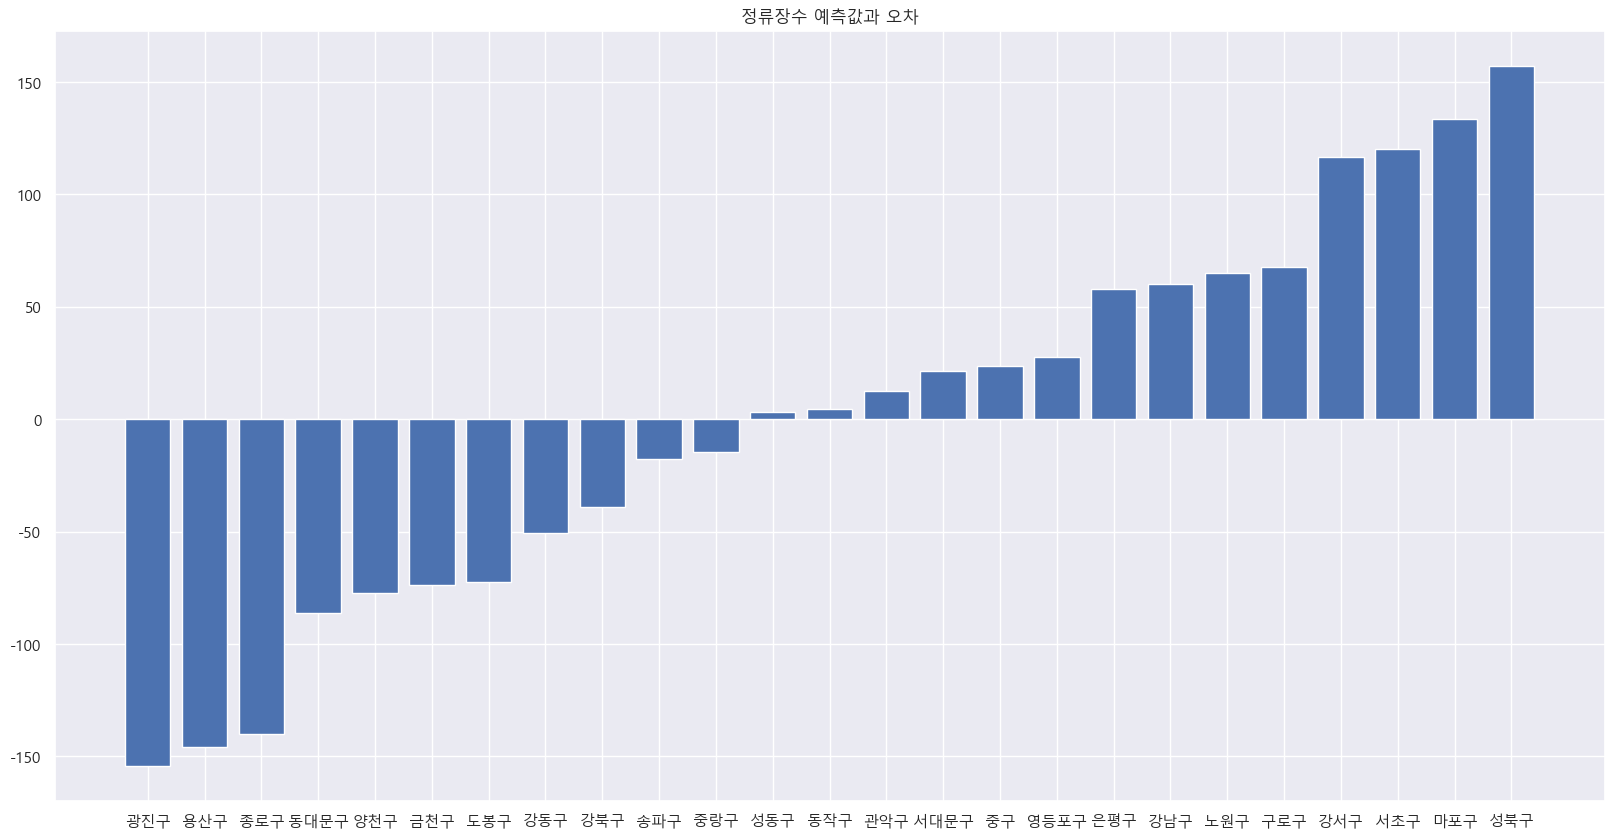

In [84]:
e["면적대비등록업종예측값오차"] = e['정류장수']-( lr.coef_[0]* e['면적대비등록업종'] + lr.intercept_)

new_df=e.sort_values("면적대비등록업종예측값오차").reset_index(drop=True)

plt.figure(figsize=(20,10))
plt.title('정류장수 예측값과 오차')
plt.bar(new_df['자치구'], new_df["면적대비등록업종예측값오차"])



plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x= e['면적대비등록업종'].values
y= e['정류장수'].values

x = x.reshape(-1,1)
y = y.reshape(-1,1)

lr.fit(x, y)

import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     11.29
Date:                Wed, 09 Nov 2022   Prob (F-statistic):            0.00270
Time:                        12:22:26   Log-Likelihood:                -146.62
No. Observations:                  25   AIC:                             297.2
Df Residuals:                      23   BIC:                             299.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        516.0802     32.514     15.872      0.000     448.819     583.341
x1            -0.1155      0.034     -3.361      0.003      -0.187      -0.044
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.635
Skew:                          -0.062   Prob(JB):                        0.728
Kurtosis:                       2.229   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""